In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
%matplotlib inline 

# Визуальный анализ рейтингов шоу Netflix
<img src="https://pp.userapi.com/c854528/v854528797/c62ce/FiPEibYUxJc.jpg" width="40%">

Netflix за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  
В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  



Описание признаков:
* `title` - название шоу.
* `rating` - рейтинг шоу. Например: G, PG, TV-14, TV-MA
* `ratingLevel` - описание рейтинговой группы и особенностей шоу.
* `ratingDescription` - рейтинг шоу, закодированный в числом
* `release year` - год выпуска шоу.
* `user rating score` - оценка пользователей.
* `user_rating_size` - общий рейтинг пользователей

## Решение

Скачайте данные: [ссылка](https://drive.google.com/file/d/1-AbKfNo1SuKPQgA4Uo9ULfMjyUtJHLRa/view?usp=sharing). Загрузите данные, выполнив код ниже.

In [2]:
!gdown --id '1-AbKfNo1SuKPQgA4Uo9ULfMjyUtJHLRa'
!mv Netflix\ Shows.csv netflix_data.csv

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-AbKfNo1SuKPQgA4Uo9ULfMjyUtJHLRa
To: /content/Netflix Shows.csv
100% 89.1k/89.1k [00:00<00:00, 81.1MB/s]


In [ ]:
from google.colab import files
uploaded = files.upload()

In [3]:
# код ниже менять нельзя, просто запустите ячейку!
data = pd.read_csv("netflix_data.csv", encoding='cp437')
del data['ratingDescription'], data['user rating size']

# ***Удалите из данных дупликаты.***

In [41]:
df = data.drop_duplicates(inplace = False)
df

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
...,...,...,...,...,...
989,Russell Madness,PG,some rude humor and sports action,2015,NaN
993,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,2015,NaN
994,Pup Star,G,General Audiences. Suitable for all ages.,2016,NaN
997,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN


**Составление тепловой карты значений в датасете. Желтый - значение есть, синий - значения нет**

Количество пропущенных значений: 277


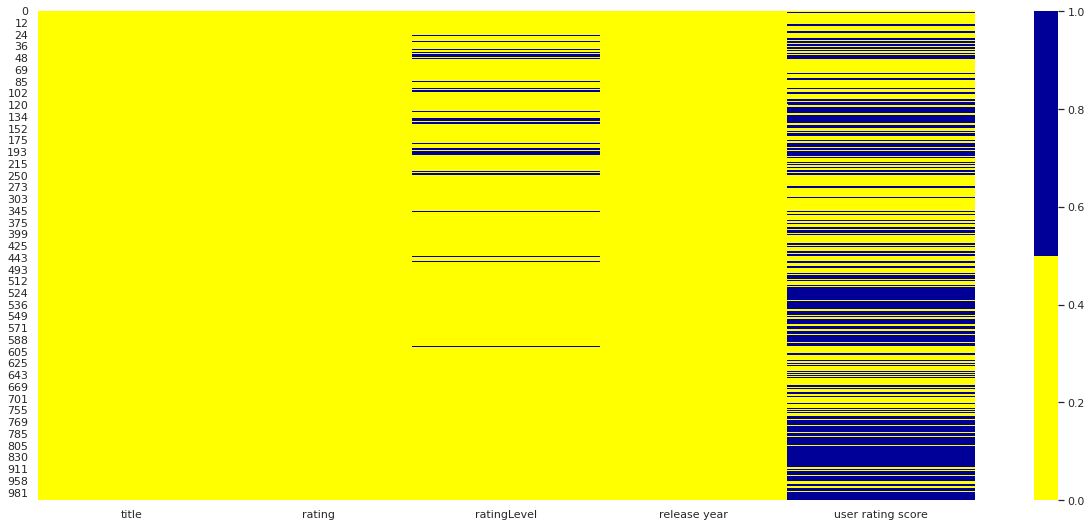

In [42]:
sns.set (rc = {'figure.figsize' : (21,9)})
cols = df.columns
colors = ['#ffff00', '#000099']
sns.heatmap(df[cols].isnull(), cmap = sns.color_palette(colors))
print(f'Количество пропущенных значений: {df.isnull().sum().sum()}')

Учитывая большое количество пропусков в столбце 'user rating score', считаю нецелесообразным (и способным исказить реальную картину) вставлять какие-либо числовые данные (нули или средние по группе) вместо пустых значений NaN. В следующей ячейке видно количество заполненных значений. Почти половине шоу пользователи рейтинги не выставили.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 998
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              500 non-null    object 
 1   rating             500 non-null    object 
 2   ratingLevel        467 non-null    object 
 3   release year       500 non-null    int64  
 4   user rating score  256 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 23.4+ KB


In [44]:
rating = df.groupby('rating').count()
rating

,title,ratingLevel,release year,user rating score
rating,,,,
G,53,52,53,19
NR,10,7,10,2
PG,76,76,76,48
PG-13,12,12,12,9
R,14,14,14,7
TV-14,106,101,106,77
TV-G,29,29,29,11
TV-MA,82,60,82,40
TV-PG,33,31,33,21


# ***Сколько рейтинговых групп представлено в данных?***

***Ответ:*** В данных представлено 13 ретинговых групп. Их названия и расчет количества ниже.

In [45]:
print(*df['rating'].unique(), sep = ',')

PG-13,R,TV-14,TV-PG,TV-MA,TV-Y,NR,TV-Y7-FV,UR,PG,TV-G,G,TV-Y7


In [46]:
df['rating'].nunique()

13

# ***Какие оценки пользователи ставят чаще? Постройте гистограмму оценок.***

In [47]:
df['user rating score'].value_counts(normalize = True,bins = 6)

(91.667, 99.0]                  0.146
(84.333, 91.667]                0.096
(77.0, 84.333]                  0.092
(69.667, 77.0]                  0.066
(54.955000000000005, 62.333]    0.058
(62.333, 69.667]                0.054
Name: user rating score, dtype: float64

Считаю, что пользователи оценивают продукт как качественный, если выставляют оценку от 77 баллов и выше, если оценка от 60 до 76 - как средний, ниже 60 - посредственный.

In [48]:
mpl.style.use(['Solarize_Light2'])

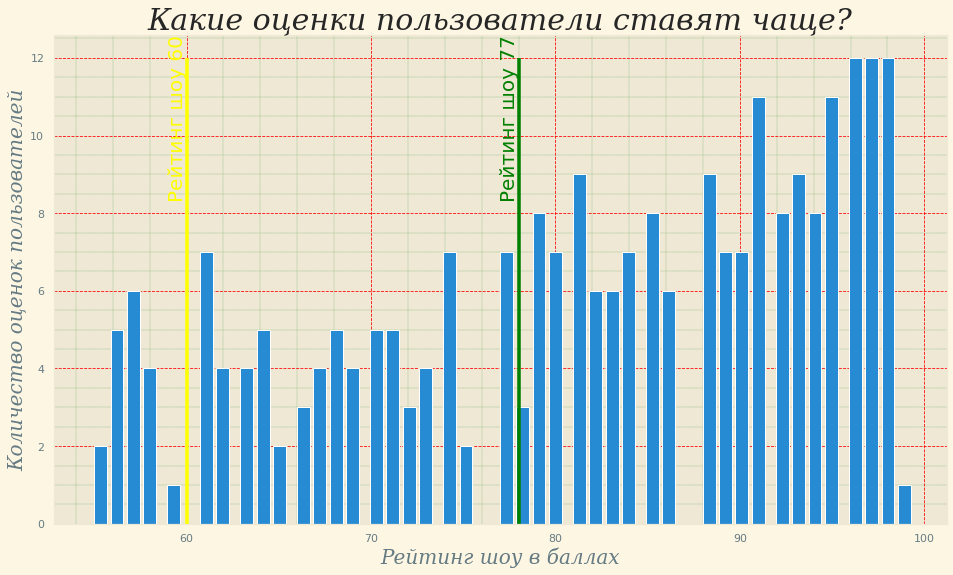

In [49]:
plt.figure(figsize = (16,9))
plt.hist(df['user rating score'], width = 0.7,bins = 100)
plt.title('Какие оценки пользователи ставят чаще?', fontfamily = 'serif',
                fontstyle = 'italic',fontsize = 30)
plt.xlabel('Рейтинг шоу в баллах', fontfamily = 'serif',
                fontstyle = 'italic',fontsize = 20)
plt.ylabel('Количество оценок пользователей', fontfamily = 'serif',
                fontstyle = 'italic',fontsize = 20)
plt.minorticks_on()
plt.grid(which = 'major', color = 'red', linewidth = 0.8, linestyle = '--')
plt.grid(which = 'minor', color = 'green', linewidth = 0.2, linestyle = '--')
plt.vlines(78, 0, 12, color = 'green', linewidth = 3.5)
plt.vlines(60, 0, 12, color = 'yellow', linewidth = 3.5)
plt.text(
    77, 8.4,
    'Рейтинг шоу 77',
    rotation = '90',
    fontsize = 20,
    color = 'green'
)
plt.text(
    59, 8.4,
    'Рейтинг шоу 60',
    rotation = '90',
    fontsize = 20,
    color = 'yellow'
)
plt.show()

***Вывод:*** Большинство оценок пользователей составляет от 77 баллов и выше, то есть большая часть контента оценена как хорошая или отличная.

# ***Выведите основную информацию об оценках пользователей: среднее, стандартное отклонение, минимум, максимум, медиана. Отличаются ли медиана и среднее? Могут ли данные характеристики значительно отличаться? Почему?***

In [50]:
inf = pd.Series(
    [df['user rating score'].mean(),
     df['user rating score'].std(),
     df['user rating score'].min(),
     df['user rating score'].max(),
     df['user rating score'].median()],
     index = ['Среднее', 'Стандартное отклонение', 'Минимум', 'Максимум', 'Медиана']
)

In [51]:
inf.to_frame()

,0
Среднее,81.398438
Стандартное отклонение,12.730904
Минимум,55.000000
Максимум,99.000000
Медиана,83.500000


***Ответ:*** В представленных данных медиана и среднее отличаются, но несущественно. Медиана менее чувствительна к сильно отличающимся друг от друга значениям, а среднее учитывает их все. Если бы в датасете были бы еще шоу с провальными рейтингами, а сам размер датасета был бы совсем небольшим, то разница между медианой и средним еще больше бы увеличилась.

# ***В какие годы были запущены шоу, представленные в датасете?***

***Ответ:*** Список представлен ниже.

In [54]:
print(*df['release year'].sort_values().unique(), sep = ',')

1940,1976,1978,1982,1986,1987,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017


# ***Постройте график, показывающий распределение количества запущенных шоу в зависимости от года. Наблюдается ли рост? Есть ли выбросы?***

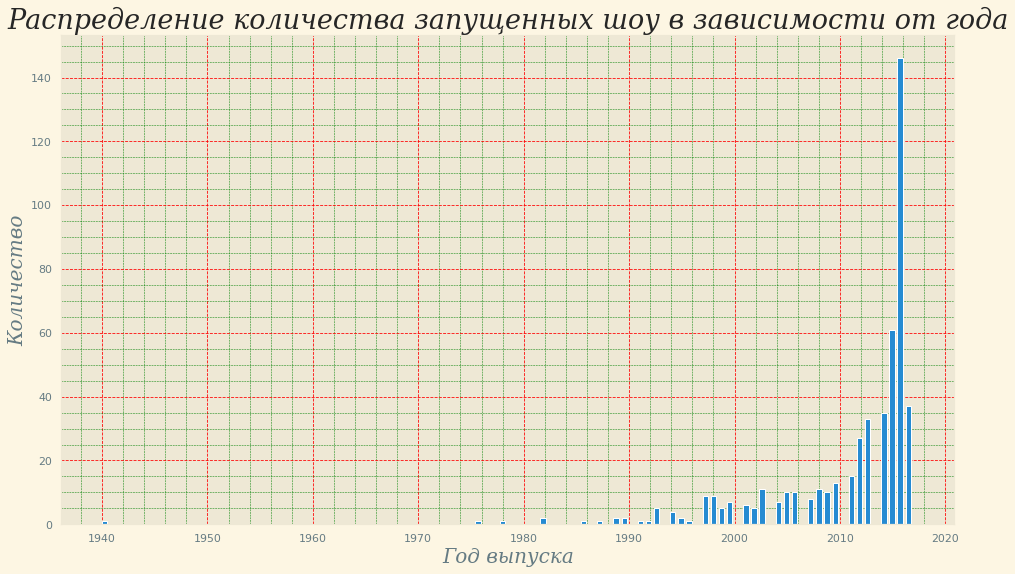

In [55]:
plt.figure(figsize = (16,9))
plt.hist(df['release year'], bins = 100, width = 0.5)
plt.title('Распределение количества запущенных шоу в зависимости от года', fontfamily = 'serif',
                fontstyle = 'italic', fontsize = 27)
plt.xlabel('Год выпуска', fontfamily = 'serif',
                fontstyle = 'italic', fontsize = 20)
plt.ylabel('Количество', fontfamily = 'serif',
                fontstyle = 'italic',fontsize = 20)
plt.minorticks_on()
plt.grid(which = 'major', color = 'red', linewidth = 0.8, linestyle = '--')
plt.grid(which = 'minor', color = 'green', linewidth = 0.5, linestyle = '--')
plt.show()

# **Теперь посмотрим на выброс.**


Ниже представлен список фильмов, год выпуска которых 2016, а также распределение по возрастным рейтингам

In [56]:
vibros = df[df.loc[:, 'release year'].values == 2016]

In [57]:
vibros

,title,rating,ratingLevel,release year,user rating score
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
5,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,95.0
9,Pretty Little Liars,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,96.0
10,Once Upon a Time,TV-PG,Parental guidance suggested. May not be suitab...,2016,98.0
11,Sherlock,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,95.0
...,...,...,...,...,...
794,Alpha and Omega: Dino Digs,TV-G,Suitable for all ages.,2016,NaN
796,Quackerz,PG,"rude and suggestive humor, and some action",2016,NaN
837,Puffin Rock,TV-Y,Suitable for all ages.,2016,NaN
848,LEGO Jurassic World: The Indominus Escape,TV-Y7,Suitable for children ages 7 and older,2016,NaN


In [58]:
vibros.groupby('rating').count()

,title,ratingLevel,release year,user rating score
rating,,,,
G,3,2,3,1
NR,6,3,6,1
PG,16,16,16,12
R,4,4,4,4
TV-14,49,48,49,36
TV-G,4,4,4,3
TV-MA,38,30,38,19
TV-PG,6,4,6,5
TV-Y,7,7,7,1


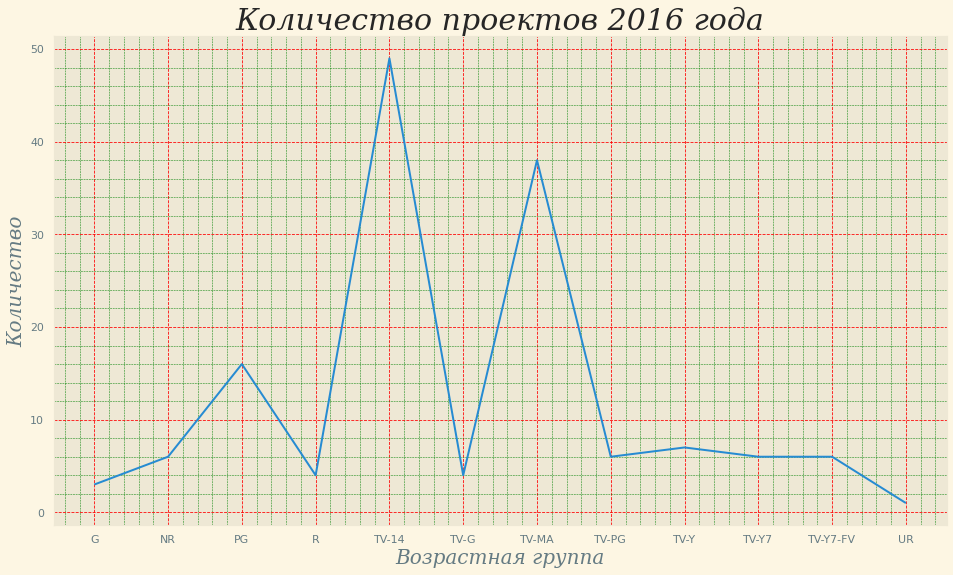

In [59]:
#Количество проектов 2016 года
plt.figure(figsize = (16, 9))
plt.plot(vibros.groupby('rating').count()[['title']])
plt.title('Количество проектов 2016 года', fontfamily = 'serif',
                fontstyle = 'italic',fontsize = 30)
plt.xlabel('Возрастная группа', fontfamily = 'serif',
                fontstyle = 'italic', fontsize = 20)
plt.ylabel('Количество', fontfamily = 'serif',
                fontstyle = 'italic',fontsize = 20)
plt.minorticks_on()
plt.grid(which = 'major', color = 'red', linewidth = 0.8, linestyle = '--')
plt.grid(which = 'minor', color = 'green', linewidth = 0.5, linestyle = '--')
plt.show()

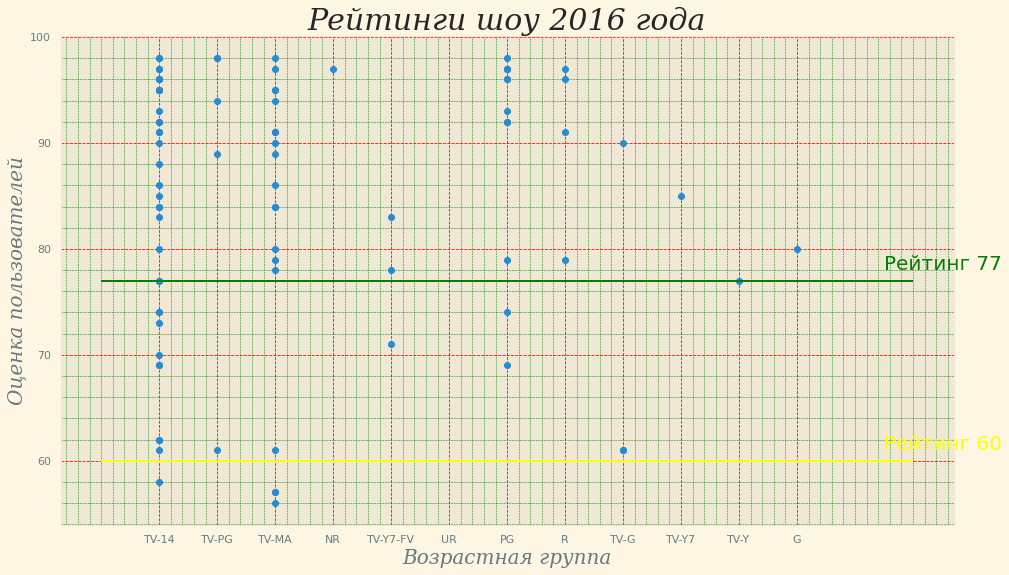

In [60]:
#Качество проектов 2016 года
plt.figure(figsize = (16, 9))
plt.scatter(vibros['rating'], vibros[['user rating score']])
plt.title('Рейтинги шоу 2016 года', fontfamily = 'serif',
                fontstyle = 'italic',fontsize = 30)
plt.xlabel('Возрастная группа', fontfamily = 'serif',
                fontstyle = 'italic', fontsize = 20)
plt.ylabel('Оценка пользователей', fontfamily = 'serif',
                fontstyle = 'italic',fontsize = 20)
plt.minorticks_on()
plt.grid(which = 'major', color = 'red', linewidth = 0.8, linestyle = '--')
plt.grid(which = 'minor', color = 'green', linewidth = 0.5, linestyle = '--')
plt.hlines(77, -1, 13, color = 'green')
plt.hlines(60, -1, 13, color = 'yellow')
plt.text(
    12.5, 78,
    'Рейтинг 77',
    rotation = '0',
    fontsize = 20,
    color = 'green')
plt.text(
    12.5, 61,
    'Рейтинг 60',
    rotation = '0',
    fontsize = 20,
    color = 'yellow')
plt.show()

***Вывод:*** Следует обратить внимание на взрывной рост количества шоу в 2016 году. Декомпозировав количество проектов на группы, склоняюсь к тому, что на этот год была выбрана агрессивная тактика увеличения количества контента. График распределения рейтингов шоу 2016 показывает также, что наряду с количеством, шоу этого года в большинстве своем еще и качественные. Особенно ударно отработали сегменты TV-14 и TV-MA.

# ***Сравните среднюю оценку пользователей в 2016 со средней оценкой в 2017. Можно ли сделать вывод, что 2017 год успешнее для Netflix? ("Успешнее" значит, что пользователи в среднем ставили более высокие оценки)***




In [61]:
d = df[df['release year'].isin([2016,2017])]

In [62]:
d.groupby('release year').agg({'title': 'count', 'user rating score': ['count', 'mean']})

title user rating score           
             count             count       mean
release year                                   
2016           146                86  84.313953
2017            37                16  88.125000

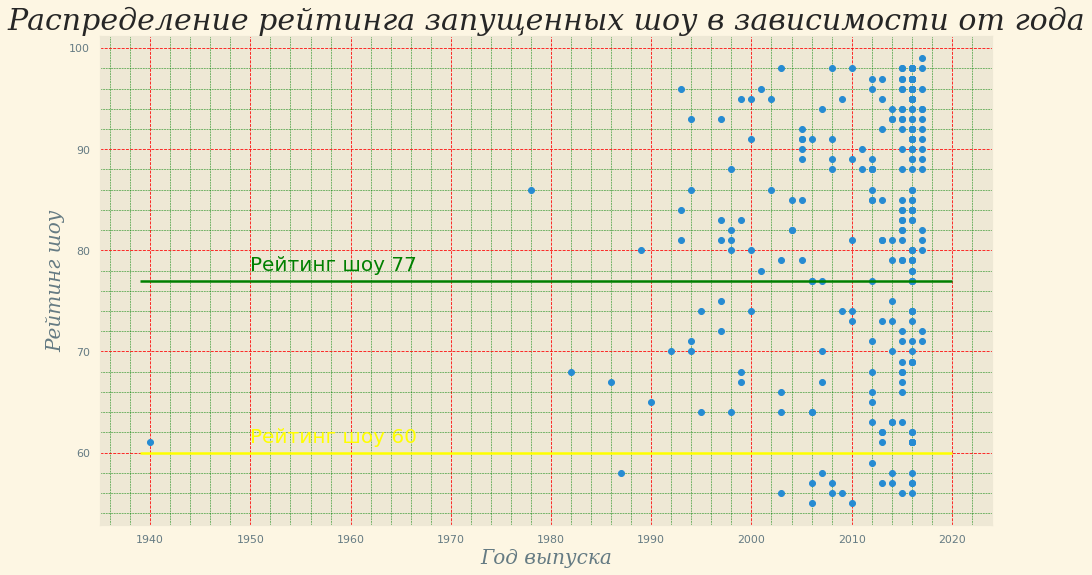

In [63]:
plt.figure(figsize = (16,9))
plt.scatter(df['release year'], df['user rating score'])
plt.title('Распределение рейтинга запущенных шоу в зависимости от года', fontfamily = 'serif',
                fontstyle = 'italic',fontsize = 30)
plt.xlabel('Год выпуска', fontfamily = 'serif',
                fontstyle = 'italic',fontsize = 20)
plt.ylabel('Рейтинг шоу', fontfamily = 'serif',
                fontstyle = 'italic',fontsize = 20)
plt.minorticks_on()
plt.grid(which = 'major', color = 'red', linewidth = 0.8, linestyle = '--')
plt.grid(which = 'minor', color = 'green', linewidth = 0.5, linestyle = '--')
plt.hlines(77, 1939, 2020, color = 'green', linewidth = 2.5)
plt.hlines(60, 1939, 2020, color = 'yellow', linewidth = 2.5)
plt.text(
    1950, 78,
    'Рейтинг шоу 77',
    rotation = '0',
    fontsize = 20,
    color = 'green'
)
plt.text(
    1950, 61,
    'Рейтинг шоу 60',
    rotation = '0',
    fontsize = 20,
    color = 'yellow'
)
plt.show()

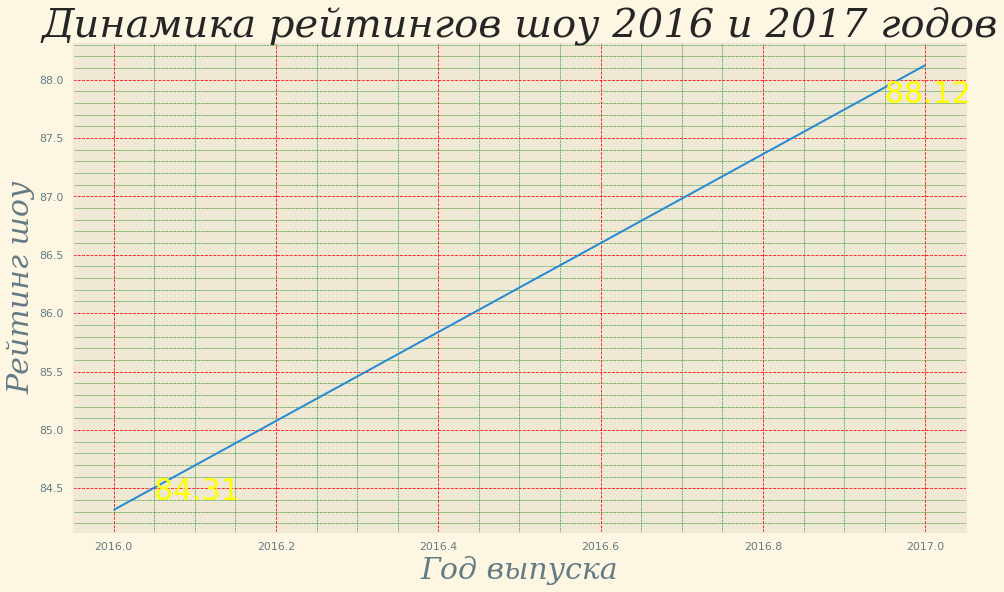

In [64]:
plt.figure(figsize = (16,9))
plt.plot(d.groupby('release year').mean()[['user rating score']])
plt.title('Динамика рейтингов шоу 2016 и 2017 годов', fontfamily = 'serif',
                fontstyle = 'italic',fontsize = 40)
plt.xlabel('Год выпуска', fontfamily = 'serif',
                fontstyle = 'italic',fontsize = 30)
plt.ylabel('Рейтинг шоу', fontfamily = 'serif',
                fontstyle = 'italic',fontsize = 30)
plt.minorticks_on()
plt.grid(which = 'major', color = 'red', linewidth = 0.8, linestyle = '--')
plt.grid(which = 'minor', color = 'green', linewidth = 0.5, linestyle = '--')
plt.text(
    2016.05, 84.4,
    '84.31',
    rotation = '0',
    fontsize = 30,
    color = 'yellow'
)
plt.text(
    2016.95, 87.8,
    '88.12',
    rotation = '0',
    fontsize = 30,
    color = 'yellow'
)
plt.show()

***Вывод:*** Средний показатель оценки пользователей растет, значит по оценкам продкута 2017 год стал успешнее. Было выпущено меньше по количеству, но лучше по качеству шоу. Предположу, что у качественных проектов и время просмотра в сервисе больше, они являются "якорями" для привлечения пользователя в подписку. Также вполне вероятно, что был выпущен эксклюзивный контент, доступный только на данном сервисе. То есть выросла окупаемость. Возможно, что меньшим количеством проектов в 2017, удалось заработать те же деньги, что и в 2016, а может, и больше.

 # ***Постройте график, показывающий распределение шоу по рейтинговым группам, который считаете более интерпретируемым. Сделайте вывод.***

In [65]:
pie = df.groupby('rating').count()[['title']].sort_values(by='title', ascending = False)

In [66]:
pie

,title
rating,
TV-14,106
TV-MA,82
PG,76
G,53
TV-Y,36
TV-PG,33
TV-G,29
TV-Y7-FV,25
TV-Y7,23


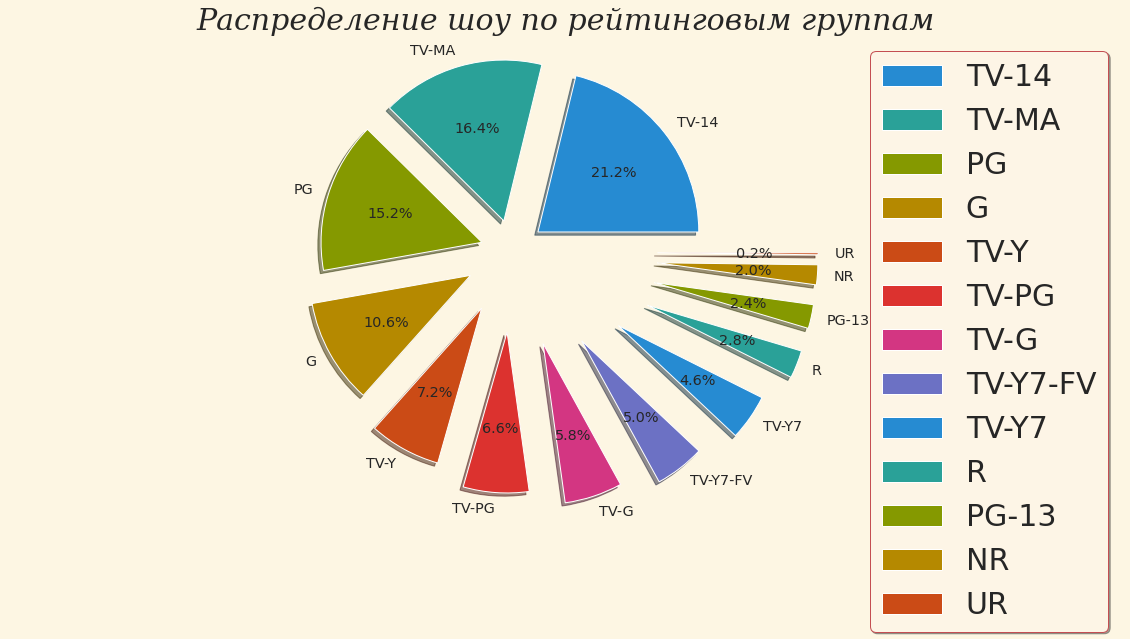

In [67]:
plt.figure(figsize=(20,9))
plt.title('Распределение шоу по рейтинговым группам', 
          fontsize = 30, 
          fontfamily = 'serif', 
          fontstyle = 'italic')
labels = list(pie.index)
explode = (0.2, 0.2, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9, 0.9, 0.9)
plt.pie(list(pie.loc[:, 'title']), 
        explode=explode, 
        labels=labels, 
        autopct='%1.1f%%', 
        textprops={'size': 'large'}, 
        shadow=True, 
        startangle=0)
plt.axis('equal')
plt.legend(shadow = True, 
          fontsize = 30, 
          ncol = 1,
          facecolor = 'oldlace',
          edgecolor = 'r')
plt.show()

***Вывод:***  Для наглядности выбираю график "Разрезанный пирожок". Портфель шоу покрывает все возрастные категории пользователей. Согласно номенклатуре присвоенных возрастных рейтингов, две трети продуктов - ТВ-шоу, остальная треть шоу-фильмы. Почти половина контента рассчитана на подростков (13-17 лет), треть - на детей (до 12 лет), примерно 20% - на пользователей старше 18 лет.

Система рейтингов Американской киноассоциации допускает разделение классификации присваеваемых рейтингов на рейтинги для фильмов отдельно и для ТВ-продукции отдельно. Поэтому сделал еще два графика структур портфеля шоу для этих отдельных категорий.

## ***Структура портфеля ТВ шоу по возрастным группам и по количеству***

In [68]:
tv = df.loc[df['rating'].str.contains('TV')].groupby('rating').count().sort_values(by = 'title', ascending = False)[['title']]

In [69]:
tv

,title
rating,
TV-14,106
TV-MA,82
TV-Y,36
TV-PG,33
TV-G,29
TV-Y7-FV,25
TV-Y7,23


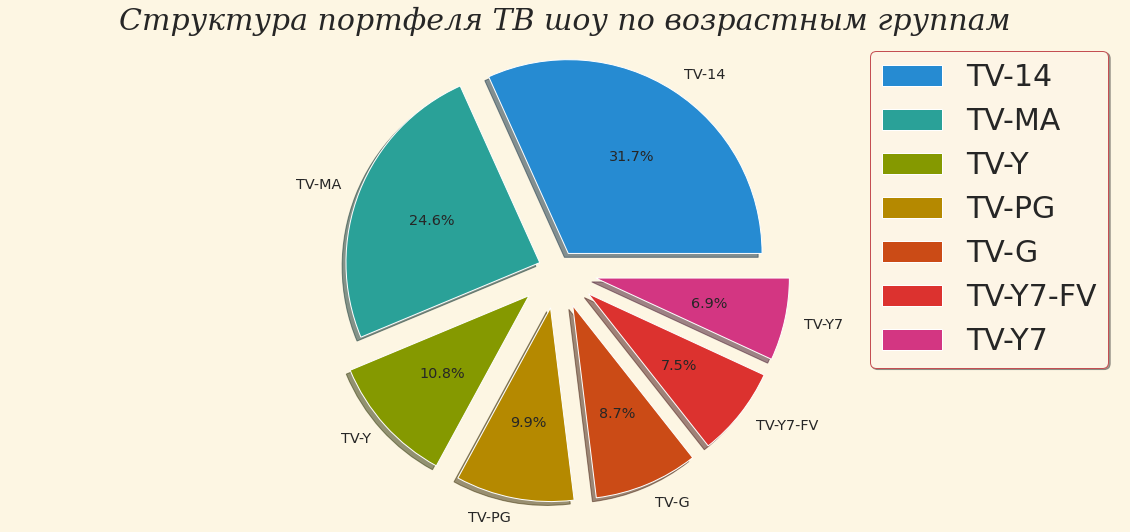

In [70]:
plt.figure(figsize = (20,9))
plt.title('Структура портфеля ТВ шоу по возрастным группам', 
          fontfamily = 'serif',
          fontstyle = 'italic',
          fontsize = 30)
labels = list(tv.index)
explode = (0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2)
plt.pie(list(tv.loc[:, 'title']),
        explode=explode, 
        labels=labels, 
        autopct='%1.1f%%', 
        textprops={'size': 'large'}, 
        shadow=True, 
        startangle=0)
plt.axis('equal')
plt.legend(shadow = True, 
          fontsize = 30, 
          ncol = 1,
          facecolor = 'oldlace',
          edgecolor = 'r')
plt.show()

***Вывод:*** Распределение портфеля ТВ шоу охватывает все возрастные группы достаточно равномерно: у 40% контента целевая аудитория подростки, 25% рассчитано на взрослых, и оставшаяся треть - на детей.

## ***Структура портфеля шоу-фильмов по возрастным группам и по количеству***

In [71]:
film = df.loc[df['rating'].str.len().between(1,2)].groupby('rating').count().sort_values(by = 'title', ascending = False)[['title']]

In [72]:
film

,title
rating,
PG,76
G,53
R,14
NR,10
UR,1


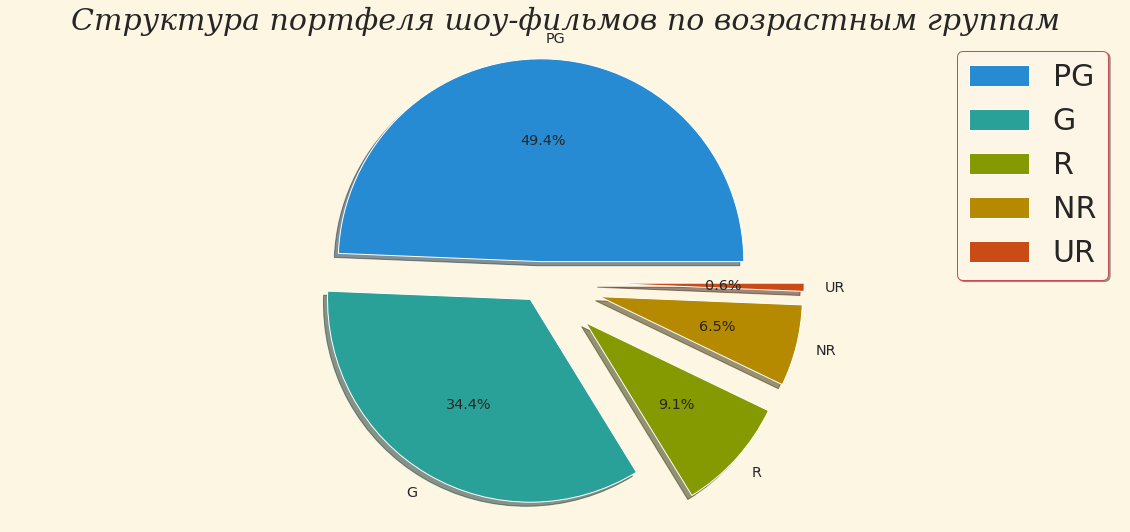

In [73]:
plt.figure(figsize = (20,9))
plt.title('Структура портфеля шоу-фильмов по возрастным группам', 
          fontfamily = 'serif',
          fontstyle = 'italic',
          fontsize = 30)
labels = list(film.index)
explode = (0.1, 0.1, 0.3, 0.3, 0.3)
plt.pie(list(film.loc[:, 'title']),
        explode=explode, 
        labels=labels, 
        autopct='%1.1f%%', 
        textprops={'size': 'large'}, 
        shadow=True, 
        startangle=0)
plt.axis('equal')
plt.legend(shadow = True, 
          fontsize = 30, 
          ncol = 1,
          facecolor = 'oldlace',
          edgecolor = 'r')
plt.show()

***Вывод:*** Распределение портфеля шоу-фильмов охватывает также все возрастные группы, на контент для подростов приходится почти две трети, остальная треть контента - для всех возрастов (целевая аудитория - родители с детьми).

# ***Составьте описательный портрет выбранного шоу***

### **Ответ:** Решил разобрать пример с шоу "Очень странные дела" (Stranger things).

Нахожу шоу в очищенном от дупликатов датасете.

In [74]:
df.loc[df['title'].str.contains('Stranger Things')]

,title,rating,ratingLevel,release year,user rating score
84,Stranger Things,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,90.0


Это шоу оригинального производства Netflix, с рейтингом пользователей 90, что считается отличным показателем. Шоу находится в группе сериалов с возрастным рейтингом TV-14, имеющей высокие показатели как количества, так и качества контента. Данный продукт ориентирован на широкую возрастную аудиторию - подростков и взрослых. Высокие рейтинги обеспечивают большое количество просмотров и способствуют лучшим продажам подписки. Об успешности сериала говорит тот факт, что он длится уже 5 сезонов. Также сериал входит в несколько топ-рейтингов, составленных авторитетными представителями индустрии кино: по версии BBC, журнала Empire, film.ru. А также входит в топы мистических, фантастических и драматических сериалов.


График, отражающий качество контента в портфеле Netflix по возрастным группам,  а также место в нем шоу "Очень странные дела" (красная область на графике), приведен ниже:

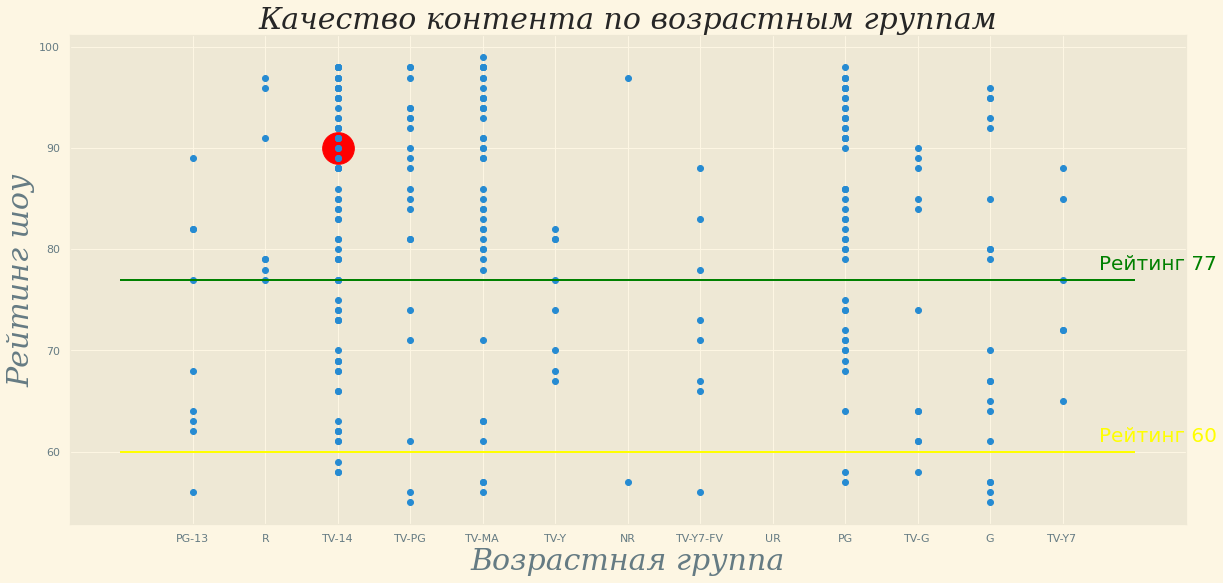

In [75]:
plt.figure(figsize = (20,9))
plt.title('Качество контента по возрастным группам', 
          fontfamily = 'serif',
          fontstyle = 'italic',
          fontsize = 30)
plt.xlabel('Возрастная группа',
           fontfamily = 'serif',
           fontstyle = 'italic',
           fontsize = 30)
plt.ylabel('Рейтинг шоу', 
           fontfamily = 'serif',
           fontstyle = 'italic',
           fontsize = 30)
v_x = 2
v_y = 90
plt.scatter(v_x, v_y, color = 'red', s = 1000)
plt.scatter(df['rating'], df['user rating score'])
plt.hlines(77, -1, 13, color = 'green')
plt.hlines(60, -1, 13, color = 'yellow')
plt.text(
    12.5, 78,
    'Рейтинг 77',
    rotation = '0',
    fontsize = 20,
    color = 'green')
plt.text(
    12.5, 61,
    'Рейтинг 60',
    rotation = '0',
    fontsize = 20,
    color = 'yellow')
plt.show()

***Вывод:*** ***Концентрация качественного контента больше в рейтинге R и TV-MA, в сочетании с меньшим  количеством "середняка" и "проходняка", в этих сегментах почти весь контент оценивают выше 77 баллов (как хороший или отличный), на первом месте по качеству R, второе место TV-MA, третье делят PG и TV-PG. Представленные для анализа шоу в половине случаев не содержат оценки пользователей, поэтому судить окончательно о качестве порфеля по состоянию на 2017 год преждевременно. ***